In [2]:
from tqdm import tqdm
import os
import sys
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""


os.chdir('/nfs/juhu/data/rakhasan/bystander-detection/gpu-code/keras-openpose-reproduce/')
sys.path.append('/nfs/juhu/data/rakhasan/bystander-detection/gpu-code/keras-openpose-reproduce/')

import pandas as pd
import openpose_wrapper as wrapper

import matplotlib.pyplot as plt
import cv2

import numpy as np
import math 

import pickle
from tqdm import tqdm
openImg_path = '/nfs/juhu/data/rakhasan/bystander-detection/google-img-db/'
survey_path='/nfs/juhu/data/rakhasan/bystander-detection/pilot-study2/'
survey_photo_path = survey_path+'/photos/'

import tensorflow as tf
from keras import backend as K
tf.set_random_seed(1234)
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess) # reference: https://keras.io/getting-started/faq/#how-can-i-obtain-the-output-of-an-intermediate-layer


Using TensorFlow backend.


### Estimate and save link angles

In [3]:
feature_df = pd.read_pickle(os.path.join(survey_path, 'high-feature-df.pkl'))

In [4]:
model=wrapper.get_model()

In [ ]:
# body_joint_angles = dict()
# photos = list(set(feature_df.index.values))

# for p in  tqdm(range(len(photos))):
#     photo_path = survey_path+'/cropped-photos/'+str(photos[p])+'.jpg'
#     img = cv2.imread(photo_path)
#     peaks, heatmap_avg, paf_avg = wrapper.get_body_joints(model=model, oriImg=img)
#     candidate, subset = wrapper.get_body_links(peaks, paf_avg, img)
#     angles = wrapper.get_link_angles(candidate, np.array([subset[0]]))
#     body_joint_angles[photos[p]] = angles
# pickle.dump(body_joint_angles, open(survey_path+'body-joint-angles.pkl','wb'))

In [6]:
# peaks1, heatmap_avg1, paf_avg1 = wrapper.get_body_joints(model=model, oriImg=oriImg)
# peaks1

In [ ]:
body_joints = dict()
photos = list(set(feature_df.index.values))
for p in  tqdm(range(len(photos[:1]))):
    photo_path = survey_path+'/cropped-photos/'+str(photos[p])+'.jpg'
    img = cv2.imread(photo_path)
    heatmap_avg, paf_avg=wrapper.get_heatmap_and_paf(model=model, oriImg=img)
    peaks=wrapper.get_heatmap_peaks(heatmap_avg=heatmap_avg)
    peaks_center = wrapper.get_single_person_peaks(peaks, img)
    wrapper.visualize_keypoints(all_peaks=peaks_center, test_image=photo_path)
    #wrapper.visualize_keypoints()
    #break
#    body_joints[photos[p]] = peaks_center

Link body parts

### Examples of link angle detection

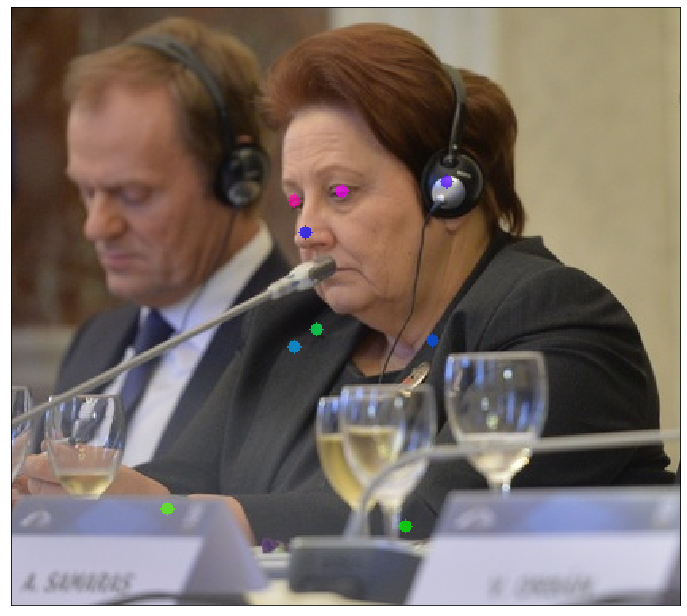

In [8]:
photo_path = '/nfs/juhu/data/rakhasan/bystander-detection/pilot-study/cropped/133.jpg'
img = cv2.imread(photo_path)

heatmap_avg, paf_avg=wrapper.get_heatmap_and_paf(model=model, oriImg=img)
peaks=wrapper.get_heatmap_peaks(heatmap_avg=heatmap_avg)
peaks_center = wrapper.get_single_person_peaks(peaks, img)
wrapper.visualize_keypoints(image_path=photo_path,keypoints=peaks_center)

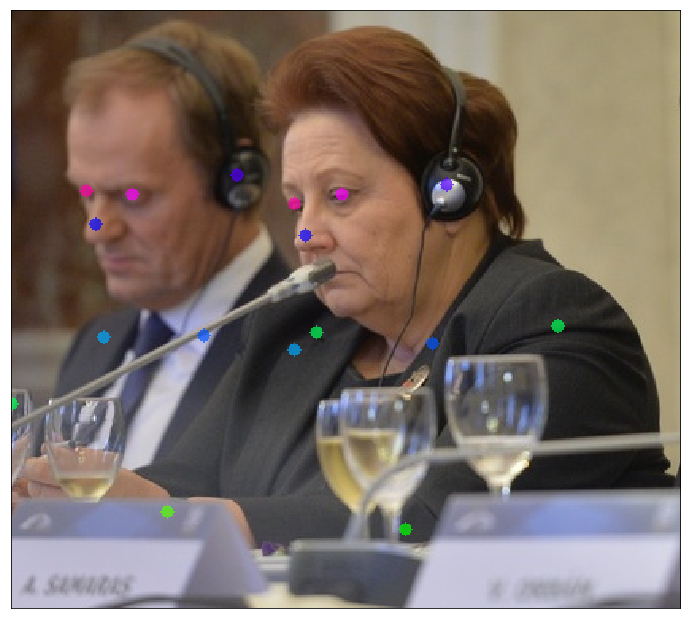

In [9]:
wrapper.visualize_keypoints(image_path=photo_path,keypoints=peaks)

found = 2
34 [-1, -1, 205.51387042753424, -1, -1, 315.66362800001326, -1, -1, 303.1704707108085, -1, 43.243011690091805, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 59.215853473673576, -1, 34.695153531233984, -1, 157.16634582208246, -1, 208.55139187296018]


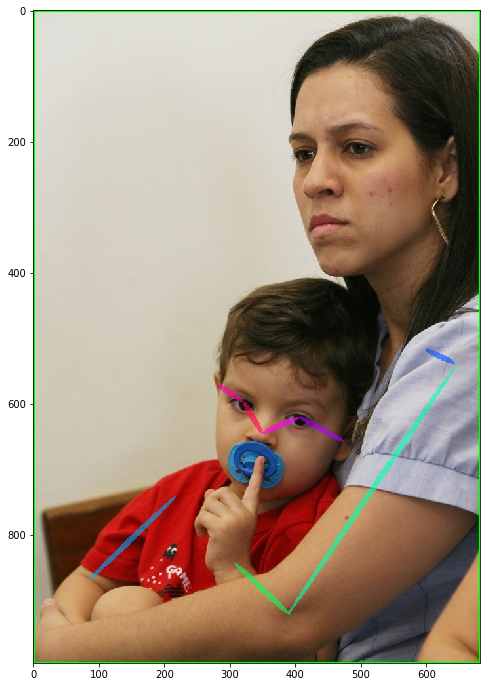

In [7]:
photo_path = survey_path+'/cropped-photos/89.jpg'
img = cv2.imread(photo_path)
peaks, heatmap_avg, paf_avg = wrapper.get_body_joints(model=model, oriImg=img)
candidate, subset = wrapper.get_body_links(peaks, paf_avg, img)
angles = wrapper.get_link_angles(candidate, subset)
print(len(angles),angles)
wrapper.visualize_body_links(photo_path, candidate=candidate, subset=subset)

[1.6846843178963127, 180.0, 281.94417718844636, 275.3893117599734, 251.27421215472742, 262.9834982552771, 279.18054195762613, 268.865578369023, 235.08059798754232, 255.2849283494022, 283.7607851117912, 264.6854543300552, 77.9052429229879, 45.0, 354.28940686250036, 127.8749836510982, 169.69515353123393]


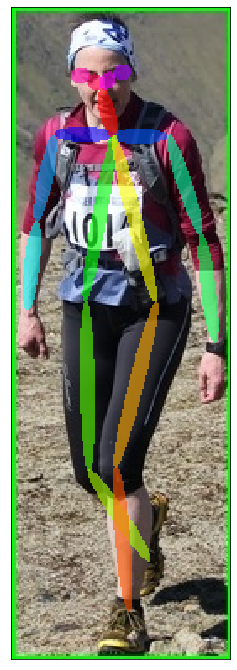

In [10]:
photo_path = survey_path+'/cropped-photos/4606.jpg'
img = cv2.imread(photo_path)
peaks, heatmap_avg, paf_avg = wrapper.get_body_joints(model=model, oriImg=img)
candidate, subset = wrapper.get_body_links(peaks, paf_avg, img)
angles = wrapper.get_link_angles(candidate, subset)
print(angles)
wrapper.visualize_body_links(photo_path, candidate=candidate, subset=subset)

[13.877529803208006, 191.1817542101967, 330.52411099675425, 317.4195092166563, 236.19204008995806, 229.35422106306962, 294.0242744785006, 262.7676212917223, 273.1169885991202, 272.21809397734825, 281.1291892896112, 286.0908163488522, 101.43368126542669, 49.89909245378777, 0.0, 135.0, 195.52411099675425]


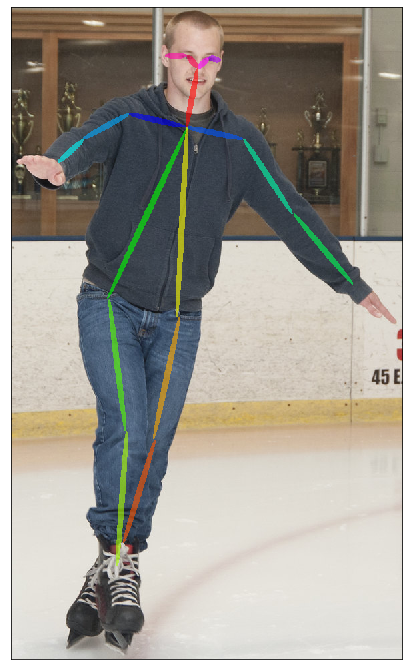

In [6]:
#photo_path = survey_path+'/cropped-photos/1019.jpg'
photo_path = '/nfs/juhu/data/rakhasan/test1.png'
img = cv2.imread(photo_path)
peaks, heatmap_avg, paf_avg = wrapper.get_body_joints(model=model, oriImg=img)
candidate, subset = wrapper.get_body_links(peaks, paf_avg, img)
angles = wrapper.get_link_angles(candidate, subset)
print(angles)
wrapper.visualize_body_links(photo_path, candidate=candidate, subset=subset)

[355.32258214111823, 177.39743779750017, 277.9434718105904, 252.67207822275878, 260.5376777919744, 353.0656510987304, 277.95936192444856, 261.653220960468, 272.4540316745271, 257.20354628529384, 260.5376777919744, 269.54707837103876, 92.66300076606717, 58.392497753751115, 2.1210963966614713, 139.9697407281103, 189.1623470457217]


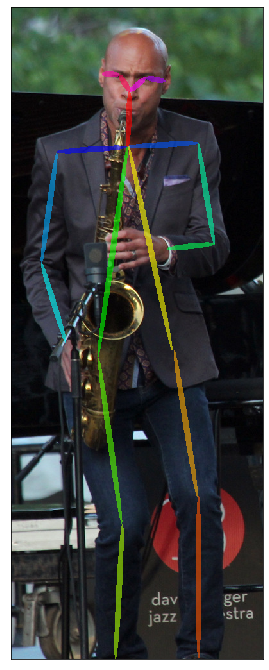

In [7]:
photo_path = '/nfs/juhu/data/rakhasan/test2.png'
img = cv2.imread(photo_path)
peaks, heatmap_avg, paf_avg = wrapper.get_body_joints(model=model, oriImg=img)
candidate, subset = wrapper.get_body_links(peaks, paf_avg, img)
angles = wrapper.get_link_angles(candidate, subset)
print(angles)
wrapper.visualize_body_links(photo_path, candidate=candidate, subset=subset)

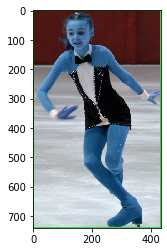

In [17]:
photo_path =  survey_path+'/cropped-photos/1019.jpg'
img = cv2.imread(photo_path)
plt.imshow(img)

In [18]:
peaks, heatmap_avg, paf_avg = wrapper.get_body_joints(model, img)

In [24]:
peaks_prob = [p[0][2] for p in peaks]
peaks_prob

[0.9086266160011292,
 0.821135088801384,
 0.7491434812545776,
 0.8043575435876846,
 0.7038772106170654,
 0.7516758739948273,
 0.7784091830253601,
 0.7743470668792725,
 0.5173792392015457,
 0.7690538913011551,
 0.45414089038968086,
 0.5032263323664665,
 0.6839069426059723,
 0.16285974439233541,
 0.932014986872673,
 0.9374033957719803,
 0.45147696882486343,
 0.9364766031503677]

In [23]:
peaks

[[(145, 93, 0.9086266160011292, 0)],
 [(175, 156, 0.821135088801384, 1)],
 [(108, 168, 0.7491434812545776, 2)],
 [(28, 276, 0.8043575435876846, 3)],
 [(73, 348, 0.7038772106170654, 4)],
 [(241, 146, 0.7516758739948273, 5)],
 [(315, 226, 0.7784091830253601, 6)],
 [(385, 291, 0.7743470668792725, 7)],
 [(204, 368, 0.5173792392015457, 8)],
 [(194, 513, 0.7690538913011551, 9)],
 [(331, 658, 0.45414089038968086, 10)],
 [(286, 352, 0.5032263323664665, 11)],
 [(270, 507, 0.6839069426059723, 12)],
 [(323, 653, 0.16285974439233541, 13)],
 [(130, 78, 0.932014986872673, 14)],
 [(163, 75, 0.9374033957719803, 15)],
 [(114, 87, 0.45147696882486343, 16)],
 [(199, 77, 0.9364766031503677, 17)]]

In [28]:
body_joint_names = ['nose', 'neck', 'Rsho', 'Relb', 'Rwri', 'Lsho', 'Lelb',
               'Lwri', 'Rhip', 'Rkne', 'Rank', 'Lhip', 'Lkne', 'Lank', 
               'Leye', 'Reye', 'Lear', 'Rear']

#angles between pairs of body joint, from openpose
link_angle_features = ['angle_'+str(i) for i in range(17)]

#probability of detecting a body joint, from openpose
body_joint_prob_features = [j + '_prob' for j in body_joint_names]

In [16]:
survey_path='/nfs/juhu/data/rakhasan/bystander-detection/pilot3_coco/'
photo_path='{}/cropped-photos/{}.jpg'.format(survey_path, 1)
img = cv2.imread(photo_path)
peaks, heatmap_avg, paf_avg = wrapper.get_body_joints(model=model, oriImg=img)
peaks_prob = [p[0][2] for p in peaks]

candidate, subset = wrapper.get_body_links(peaks, paf_avg, img)
angles = wrapper.get_link_angles(candidate, subset)

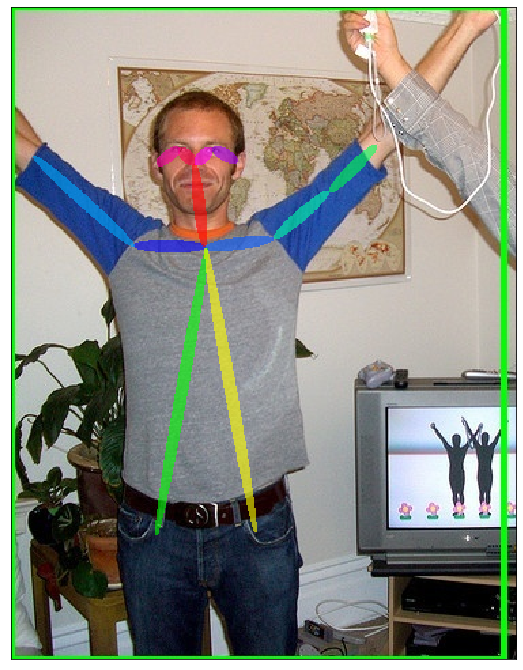

In [17]:
wrapper.visualize_body_links(photo_path, candidate=candidate, subset=subset)

In [43]:
angles

[189.46232220802563,
 -1,
 -1,
 -1,
 233.9726266148964,
 -1,
 -1,
 -1,
 -1,
 282.80426606528675,
 -1,
 254.7448812969422,
 256.6754687381092,
 -1,
 187.1250163489018,
 -1,
 259.38034472384487,
 -1,
 271.54815769897795,
 -1,
 -1,
 -1,
 -1,
 -1,
 147.26477372789236,
 -1,
 71.56505117707798,
 -1,
 8.130102354155952,
 -1,
 -1,
 -1,
 -1,
 -1]

In [74]:
len(subset[0]),subset

(20, array([[ 0.        ,  1.        ,  2.        ,  3.        , -1.        ,
          5.        ,  6.        ,  7.        ,  8.        , -1.        ,
         -1.        , 11.        , -1.        , -1.        , 14.        ,
         15.        , 16.        , 17.        , 17.92977994, 13.        ]]))

In [14]:
len(subset),len(subset[0]),
subset[0]

array([ 0.        ,  1.        ,  2.        ,  3.        , -1.        ,
       -1.        , -1.        , -1.        ,  8.        ,  9.        ,
       10.        , 11.        , -1.        , -1.        , 14.        ,
       -1.        , 16.        , -1.        ,  9.49818939, 10.        ])

In [41]:
oriImg=img
peaks, heatmap_avg, paf_avg = wrapper.get_body_joints(model, oriImg)
peaks_center = wrapper.get_single_person_peaks(peaks, oriImg)
candidate, subset = wrapper.get_body_links(peaks, paf_avg, oriImg)

In [52]:
def get_single_person_angles(all_angles,  subset):
    '''
    For now, simple return the set of angles for which
    "subset" has the largest number of entries.
    '''
    if len(subset)==0 or len(subset[0]) == 0:
        print('returning')
        return all_angles

    idx = 0
    count = subset[0][-1]
    for i in range(1,len(subset)):
        if subset[i][-1]>count:
            idx = i
    return all_angles[idx:(idx+1)*17]

In [53]:
angles = wrapper.get_link_angles(candidate, subset)
angles22 = get_single_person_angles(angles, subset)

I


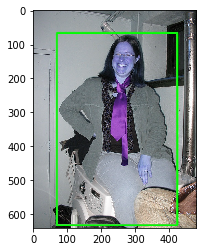

In [67]:
photo_path='/nfs/juhu/data/rakhasan/bystander-detection//pilot3_coco//photos/100.jpg'
img = cv2.imread(photo_path)
plt.imshow(img)

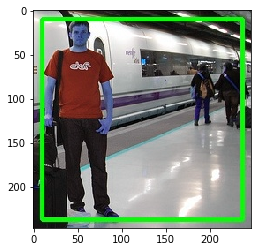

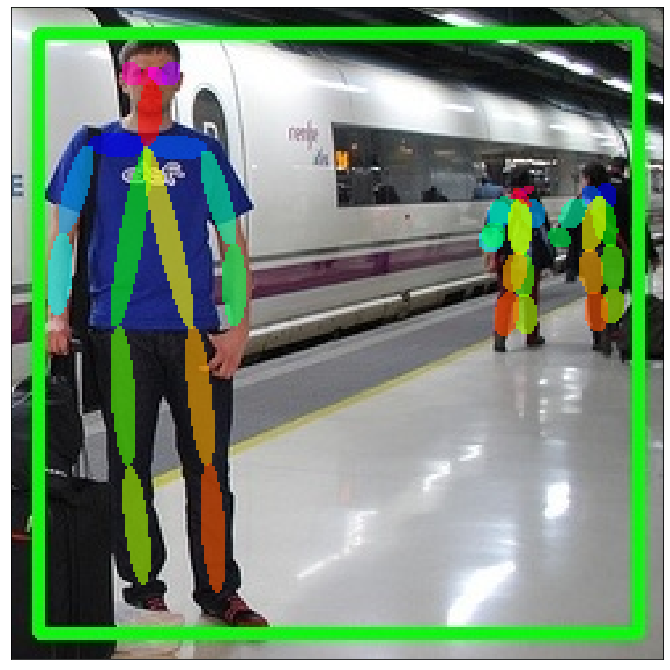

In [3]:
photo_path='/nfs/juhu/data/rakhasan/bystander-detection//pilot3_coco//cropped-photos/98.jpg'
img = cv2.imread(photo_path)
plt.imshow(img)
plt.show()
peaks, heatmap_avg, paf_avg = wrapper.get_body_joints(model=model, oriImg=img)
peaks_prob = [p[0][2] for p in peaks]

candidate, subset = wrapper.get_body_links(peaks, paf_avg, img)
angles = wrapper.get_link_angles(candidate, subset)
wrapper.visualize_body_links(photo_path, candidate=candidate, subset=subset)

In [61]:
def get_single_person_joint_angle2(model, oriImg):
    peaks, heatmap_avg, paf_avg = wrapper.get_body_joints(model, oriImg)
    peaks_center = wrapper.get_single_person_peaks(peaks, oriImg)
    candidate, subset = wrapper.get_body_links(peaks, paf_avg, oriImg)
    angles = wrapper.get_link_angles(candidate, subset)
    print(len(angles))
    single_person_angles = wrapper.get_single_person_angles(angles, subset)
    print(len(angles))
    return peaks_center, single_person_angles

In [62]:
p,a=get_single_person_joint_angle2(model, oriImg)

85
17


In [63]:
len(a)

17

In [12]:
peaks_center = wrapper.get_single_person_peaks(peaks, img)

In [29]:
candidate2, subset2 = wrapper.get_body_links(peaks_center, paf_avg, img)

In [30]:
angles2 = wrapper.get_link_angles(candidate, subset)

In [34]:
img = cv2.imread('/nfs/juhu/data/rakhasan/bystander-detection//pilot3_coco//cropped-photos/98.jpg')
peaks, angles = wrapper.get_single_person_joint_angle(model=model, oriImg=img)

In [36]:
len(angles)

33

In [39]:
if len(subset)==0 or len(subset[0]) == 0:
    print("a")